# Data Exploration and Data Pre Processing

# # Steps taken for Data Exploration and Pre Processing

# Step 1 - 
         (i)   Reading the data.
         (ii)  Finding the Shape of the Data 
         (iii) Finding the column names and data types of every column. 
         (iv)  Describing/Decriptive statistics of the data including the object type data.
         (v)   Finding out if there are NUll Values in each column.
         (vi)  Finding number and Percentage of spare parts supplied. 
               
# Step 2 - 
         (i)   Copying data to another Data Frame to ensure that the orginal DataFrame does not 
               change.
         (ii)  Binning by using quantile cut of volume of spare part supplied.
               Analysing the density of Spare parts using KDE Plot.
         (iii) Plotting count plots for the number of spare parts supplied for each input
               columns(category) and summarising the findings about the major feature. 


# Step 3 -   
         (i)   Finding co-relation between all the attributes with the volume of spare parts supplied. 
               Interpretations about the correlation between each attribute.  
         (ii)  Further analysis of categories/columns (having very high corelations with respect to volume of spare parts                      supplied with all attributes), with respect to weather condition, region and vehicle type.
               
# Step 4 -   
         (i)   Saving the Spare parts supplied data after completion of explorations, feature 
               engineering and unwanted features removed.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import numpy as np
import plotly.express as px
import matplotlib.ticker as mtick
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime


# (i) Reading the csv file of Spare Parts Inventory Management and checking the data read. 

In [2]:
data = pd.read_excel('Spare_Parts.xlsx')

In [3]:
data.head()

Date Spare Parts Name Region              City  Replacement Cycle  \
0 2021-05-12       Air Filter  South         Duffyland                750   
1 2021-05-12       Air Filter  South       Dunlapville                750   
2 2021-05-12       Air Filter  South       Dunlapville                750   
3 2021-05-20       Air Filter  South   East Carriefort                744   
4 2021-05-20       Air Filter  South  East Charlesbury                743   

   Re-Order Level  Lead time  Weather Condition Vehicle Type  \
0             134           4             Foggy          Bus   
1             134           4             Foggy          Van   
2             134           4             Foggy          Bus   
3             149           5             Foggy        Truck   
4             149           5             Foggy          Car   

   Volume of Spare Parts Supplied  
0                            1232  
1                            1233  
2                            1234  
3                            1235  
4                            1236

# (ii)     Finding the Shape of the Data (iii)    Finding the column names and data types of every column. (iv) Describing /Decriptive statistics of the data including the object type data

In [4]:
grouped = data.groupby("Spare Parts Name")
df_new = grouped.get_group('Tyre')
df_new["City"].nunique()

305

In [5]:
data.shape

(8000, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            8000 non-null   datetime64[ns]
 1   Spare Parts Name                8000 non-null   object        
 2   Region                          8000 non-null   object        
 3   City                            8000 non-null   object        
 4   Replacement Cycle               8000 non-null   int64         
 5   Re-Order Level                  8000 non-null   int64         
 6   Lead time                       8000 non-null   int64         
 7   Weather Condition               8000 non-null   object        
 8   Vehicle Type                    8000 non-null   object        
 9   Volume of Spare Parts Supplied  8000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 625.1+ KB


In [7]:
data.describe(include='object')

Spare Parts Name      Region       City Weather Condition Vehicle Type
count              8000        8000       8000              8000         8000
unique               10           8       1000                 5            5
top           Brake Pad  South-East  Duffyland             Rainy          Van
freq               1400        1484          8              3112         1632

## There are total 8000 records for all Spare Parts combined together.  There are 10 Unique Spare Parts, 8 Unique Regions, 1000 Unique Cities, 5 Weather Condition and 5 Unique Type of Vehicles. Number of occurences of Brakepad Spare Parts (1400) is maximum(1400) . South East Region (1484), City- Dufyland (8), Weather-Rainy(3112), Vehicle Type Van has got maximum number (1632) of Spare Parts. 

In [8]:
import warnings
warnings.simplefilter('ignore')

# (v)   Finding out if there are Null Values in each column

In [9]:
null_values = data.isnull().sum()
print(null_values)

Date                              0
Spare Parts Name                  0
Region                            0
City                              0
Replacement Cycle                 0
Re-Order Level                    0
Lead time                         0
Weather Condition                 0
Vehicle Type                      0
Volume of Spare Parts Supplied    0
dtype: int64


In [10]:
import warnings
warnings.simplefilter('ignore')

# Finding out the Outliers using the Box Plot

In [11]:
num=[]
for col in data.columns:
    if data[col].dtype == 'int64':
        num.append(col)
        
print(num)

['Replacement Cycle', 'Re-Order Level', 'Lead time ', 'Volume of Spare Parts Supplied']


In [12]:
len(num)

4

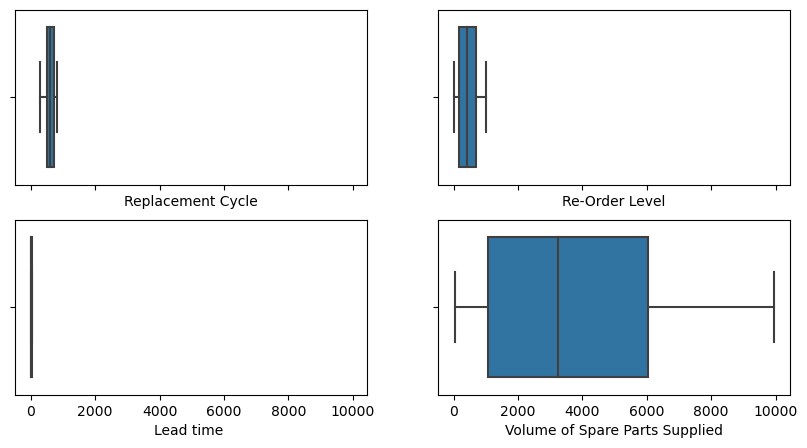

In [13]:
fig, axs = plt.subplots(2,2, figsize=(10,5), sharex=True, sharey=True)
for i in range(0,4):
    row = i//2;
    col = i%2;
    sns.boxplot(data[num[i]],ax=axs[row,col])

### No Outliers Found

## Creating pivot table for Weather Condition, Volume of Spare Parts and Spare Part Name

In [14]:
pivot1= data.pivot_table(index='Spare Parts Name',columns="Weather Condition",values="Volume of Spare Parts Supplied",aggfunc='sum')
pivot1

Weather Condition   Foggy    Rainy    Snowy   Sunny   Windy
Spare Parts Name                                           
Air Filter          80308   531179   724935  141189  187740
Alternator          54015  3180030  2085829  200465  217491
Battery             53570  2304160  1118732  296293   20969
Brake Disc          34598   713924   774308   38786   30095
Brake Pad          106829  2307520  2582969   62955  248688
Oil Filter          44106  1536673  1217976   60962   37611
Radiator            38553  1687195  1374095   56754   49979
Spark Plug           7649  1571255   626641   37395   19590
Starter Motor       30487  1396647   722537   44945    9945
Tyre                23794   862256   810212   37830   59653

## Visualization using stack bar of Volume of Spare Parts supplied vs Spare Parts Name and Weather Condition



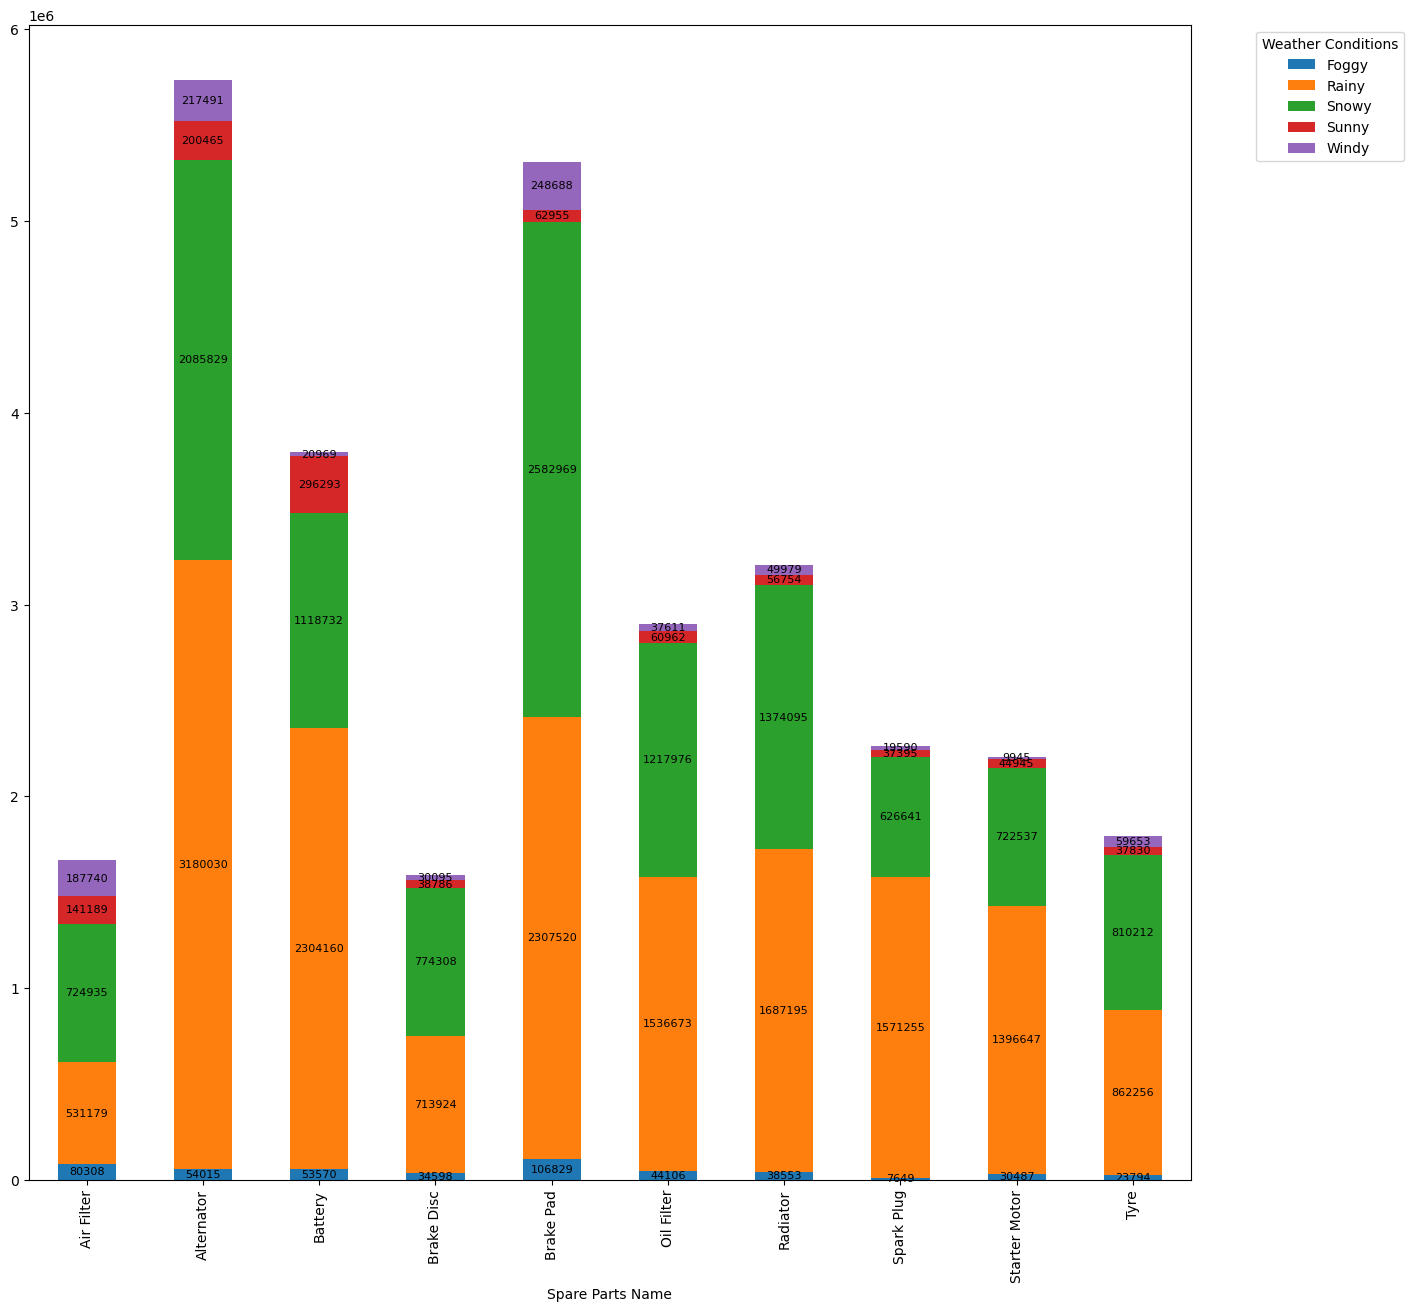

In [15]:
ax=pivot1.plot(kind='bar', stacked=True, figsize=(15, 15))
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()# The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'
    label_x = x + width / 2
    label_y = y + height / 2# don't include label if it's equivalently 0
    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

## Interpretation (Weather condition Versus Spare Parts)

Rainy and Snowy Weather Condition have most volume of spares for every Spare Part.
While Foggy weather condition have lowest volume of spares for every Spare part.

In [16]:
pivot2=data.pivot_table(index='Spare Parts Name',columns=["Vehicle Type","Weather Condition"],values="Volume of Spare Parts Supplied",aggfunc='sum')
pivot2

Vehicle Type           Bus                                            Car  \
Weather Condition    Foggy     Rainy     Snowy    Sunny    Windy    Foggy   
Spare Parts Name                                                            
Air Filter         20291.0   74575.0  143966.0  27249.0  58452.0  14047.0   
Alternator         11515.0  648866.0  362029.0  36611.0  27595.0   9769.0   
Battery            12763.0  503548.0  291137.0  65813.0   4115.0   8860.0   
Brake Disc          7440.0  138045.0  160065.0   9545.0   5636.0   7428.0   
Brake Pad          21347.0  427728.0  469680.0  12664.0  58165.0  23275.0   
Oil Filter          9247.0  279267.0  214929.0  14578.0   3581.0   5721.0   
Radiator            9170.0  380285.0  249977.0   9798.0   9364.0   4556.0   
Spark Plug          1074.0  257234.0   77863.0   4563.0   3911.0   2778.0   
Starter Motor       3552.0  310235.0  138850.0   9780.0   1989.0   5642.0   
Tyre                1203.0  179945.0  168223.0   6867.0   9247.0   7591.0   

Vehicle Type                                             ...    Truck  \
Weather Condition     Rainy     Snowy    Sunny    Windy  ...    Foggy   
Spare Parts Name                                         ...            
Air Filter         128488.0  118587.0  27162.0  45881.0  ...  15449.0   
Alternator         716177.0  427735.0  46412.0  40327.0  ...   9423.0   
Battery            459661.0  181081.0  54945.0   4263.0  ...  10073.0   
Brake Disc         147468.0  152788.0   6569.0   3594.0  ...   8265.0   
Brake Pad          430475.0  450640.0   8051.0  53096.0  ...  21603.0   
Oil Filter         342644.0  278438.0  12355.0   9016.0  ...  11131.0   
Radiator           281672.0  253230.0  12964.0   7599.0  ...   7479.0   
Spark Plug         330751.0  149944.0  10311.0   2927.0  ...   1596.0   
Starter Motor      245427.0  151952.0   9224.0   2989.0  ...   6403.0   
Tyre               157053.0  152637.0   5235.0  15424.0  ...   5057.0   

Vehicle Type                                                 Van            \
Weather Condition     Rainy     Snowy    Sunny    Windy    Foggy     Rainy   
Spare Parts Name                                                             
Air Filter         124117.0  198240.0  24828.0  25038.0  14951.0  110985.0   
Alternator         645310.0  358308.0  40319.0  45982.0   9710.0  559899.0   
Battery            390623.0  187667.0  49326.0   2872.0  11186.0  420054.0   
Brake Disc         147974.0  137080.0  10380.0   7090.0   5474.0  112888.0   
Brake Pad          494878.0  592245.0  13832.0  59212.0  15737.0  480947.0   
Oil Filter         264081.0  283268.0  13275.0   9858.0   6740.0  318409.0   
Radiator           411738.0  275238.0  10925.0  10430.0   6767.0  335727.0   
Spark Plug         231215.0  135424.0   7886.0   1962.0    665.0  393802.0   
Starter Motor      302994.0  136784.0   8372.0   1988.0   9938.0  220626.0   
Tyre               146715.0  179789.0   8689.0   9281.0   4576.0  168538.0   

Vehicle Type                                   
Weather Condition     Snowy    Sunny    Windy  
Spare Parts Name                               
Air Filter         139398.0  34677.0  29224.0  
Alternator         523030.0  48186.0  41234.0  
Battery            306771.0  72896.0   3027.0  
Brake Disc         152770.0   4705.0  10024.0  
Brake Pad          549847.0  12885.0  46891.0  
Oil Filter         250153.0  13018.0  12478.0  
Radiator           269177.0   9974.0  13183.0  
Spark Plug         137330.0  10469.0   4901.0  
Starter Motor      168896.0   8394.0   2979.0  
Tyre               103310.0  11168.0  15463.0  

[10 rows x 25 columns]

# Volume of Spare Parts is analyzed by using Stack Bar of Spare Parts Name vs Vehicle Type and Weather Condition

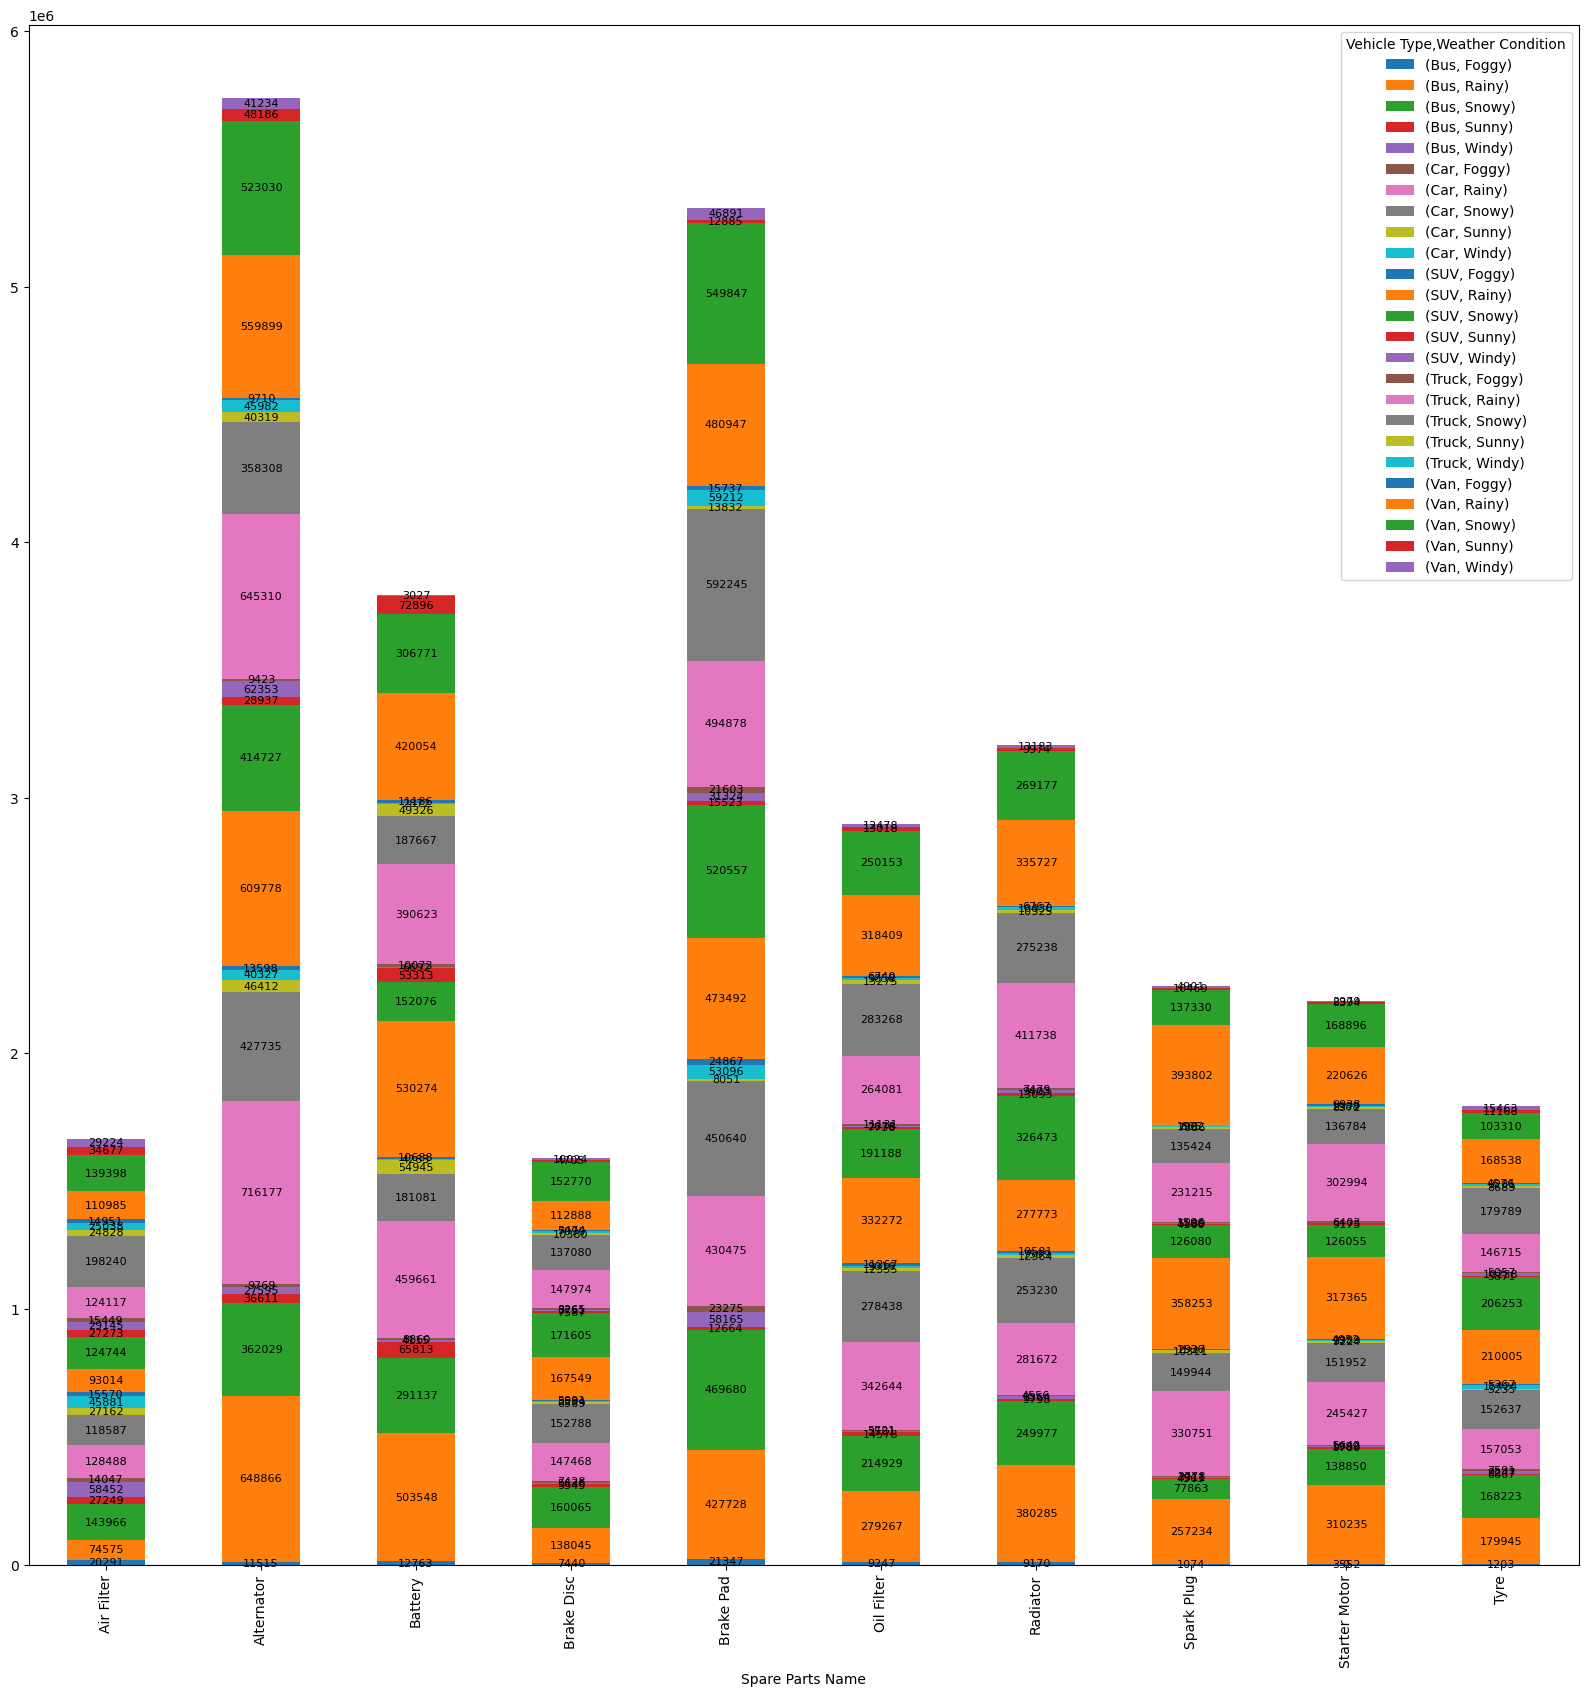

In [17]:
# sns.heatmap(pivot2, cmap='YlGnBu')
# plt.show()
ax=pivot2.plot(kind='bar', stacked=True, figsize=(20, 20))
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)


# Interpretation :
(a) Air Filter - Highest volume(198240) in snowy weather condition and for car. Lowest volume(14047) for foggy weather condition and for Car

(b) Alternator has highest volume(716177) in rainy weather condition and for cars. Lowest volume(9423) for foggy weather condition and for truck.

(c) Battery has highest volume(530224) in rainy weather condition for SUV and lowest volume (3027) for windy weather condition for van. 

(d) Brake Disc has highest volume(171605) in snowy weather condition for SUV . Lowest volume(7428) for foggy weather condition for car. 

(e) Brake Pad has highest volume(592245) in snowy weather condition and for truck. Lowest volume(8051) for sunny weather condition and for car.

(f) Oil Filter has highest volume(342644) in rainy weather condition and for car. Lowest volume(5324) for foggy weather condition for car. 

(g) Radiator has highest volume (411738) in rainy weather condition for truck and lowest volume(4558) for foggy weather condition and for car. 

(h) Spark Plug has highest volume (393802) in rainy weather condition and for van and lowest volume (1024) for foggy weather condition and for bus. 

(i) Starter Motor has highest volume (317365) in rainy weather condition and for SUV. Lowest volume (3553) for spares in foggy weather condition for bus. 

(j) Tyer has highest volume (210005) in rainy weather condition and for SUV. Lowest volume (1203) for foggy weather condition and for bus.

# Summary - Spare Parts Vs Weather Vs Cars

(a) It is always the Rainy and Snowy seasons which results in high supplying of Spare Parts. Whereas for Foggy, Windy and Sunny, the Spare Parts Supplied is always on the lower side.

(b) For Snowy Seasons the Spare Parts Supplier should always keep maximum number of - Air Filter, Brake Disc and Brake Pad.  Predictions for the quantity to be maintained is shown later.

(b) For Rainy Seasons, the Spare Parts Supplier should always keep maximum number of -  Alternator,Battery,Oil Filter,Radiator,Spark Plug,Starter Motor,Tyer. Predictions for the quantity to be maintained is shown later.

# Creating pivot table for Spare Parts Name vs Vehicle Type and Region

In [18]:
pivot3=data.pivot_table(index='Spare Parts Name',columns=["Vehicle Type","Region"],values="Volume of Spare Parts Supplied",aggfunc='sum',fill_value=0)
pivot3

Vehicle Type         Bus                                                   \
Region              East   North North-East North-West   South South-East   
Spare Parts Name                                                            
Air Filter          8574       0     167112          0  148847          0   
Alternator        129309   83170      56145     121528   45759      19769   
Battery                0       0     141903          0  179622     480491   
Brake Disc        132990       0          0          0  124922       7540   
Brake Pad          66416  396776     112184      45612   18640     211738   
Oil Filter         76497   10890          0     144451   45554     190432   
Radiator               0  144028          0          0  188378     104359   
Spark Plug             0       0      29420      12108       0          0   
Starter Motor          0   33933          0          0  103398     231247   
Tyre              153870    9074          0          0   32558          0   

Vehicle Type                            Car          ...      Truck          \
Region           South-West    West    East   North  ... South-West    West   
Spare Parts Name                                     ...                      
Air Filter                0       0    7876       0  ...          0       0   
Alternator           161975  468961  195045   67775  ...     221104  431337   
Battery                   0   75360       0       0  ...          0   54084   
Brake Disc                0   55279  117526       0  ...          0  109249   
Brake Pad             79024   59194   75213  388312  ...      66361   22723   
Oil Filter                0   53778   79602   28974  ...          0   43200   
Radiator             174765   47064       0  159239  ...     205261   70251   
Spark Plug           303117       0       0       0  ...     332121       0   
Starter Motor             0   95828       0   51488  ...          0   75011   
Tyre                      0  169983  155724    9074  ...          0  191193   

Vehicle Type         Van                                                   \
Region              East   North North-East North-West   South South-East   
Spare Parts Name                                                            
Air Filter         13303       0     124386          0  191546          0   
Alternator        157541  118442      66090      81121  113211      30413   
Battery                0       0     122348       7860  161831     432057   
Brake Disc        129266       0          0          0   59703       9505   
Brake Pad          64272  474121     130246      54827   18805     233112   
Oil Filter        101368   39506          0     183930   35811     141253   
Radiator               0  161176          0          0  151613     132704   
Spark Plug             0       0      24752      33179       0          0   
Starter Motor          0   49678          0          0  108725     204929   
Tyre              104656   10156          0          0    8826          0   

Vehicle Type                         
Region           South-West    West  
Spare Parts Name                     
Air Filter                0       0  
Alternator           172656  442585  
Battery                   0   89838  
Brake Disc                0   87387  
Brake Pad             68124   62800  
Oil Filter                0   98930  
Radiator             161487   27848  
Spark Plug           489236       0  
Starter Motor             0   47501  
Tyre                      0  179417  

[10 rows x 40 columns]

## Volume of Spare Parts is analyzed using Stack Bar for Spare Parts Name vs Vehicle Type and Region

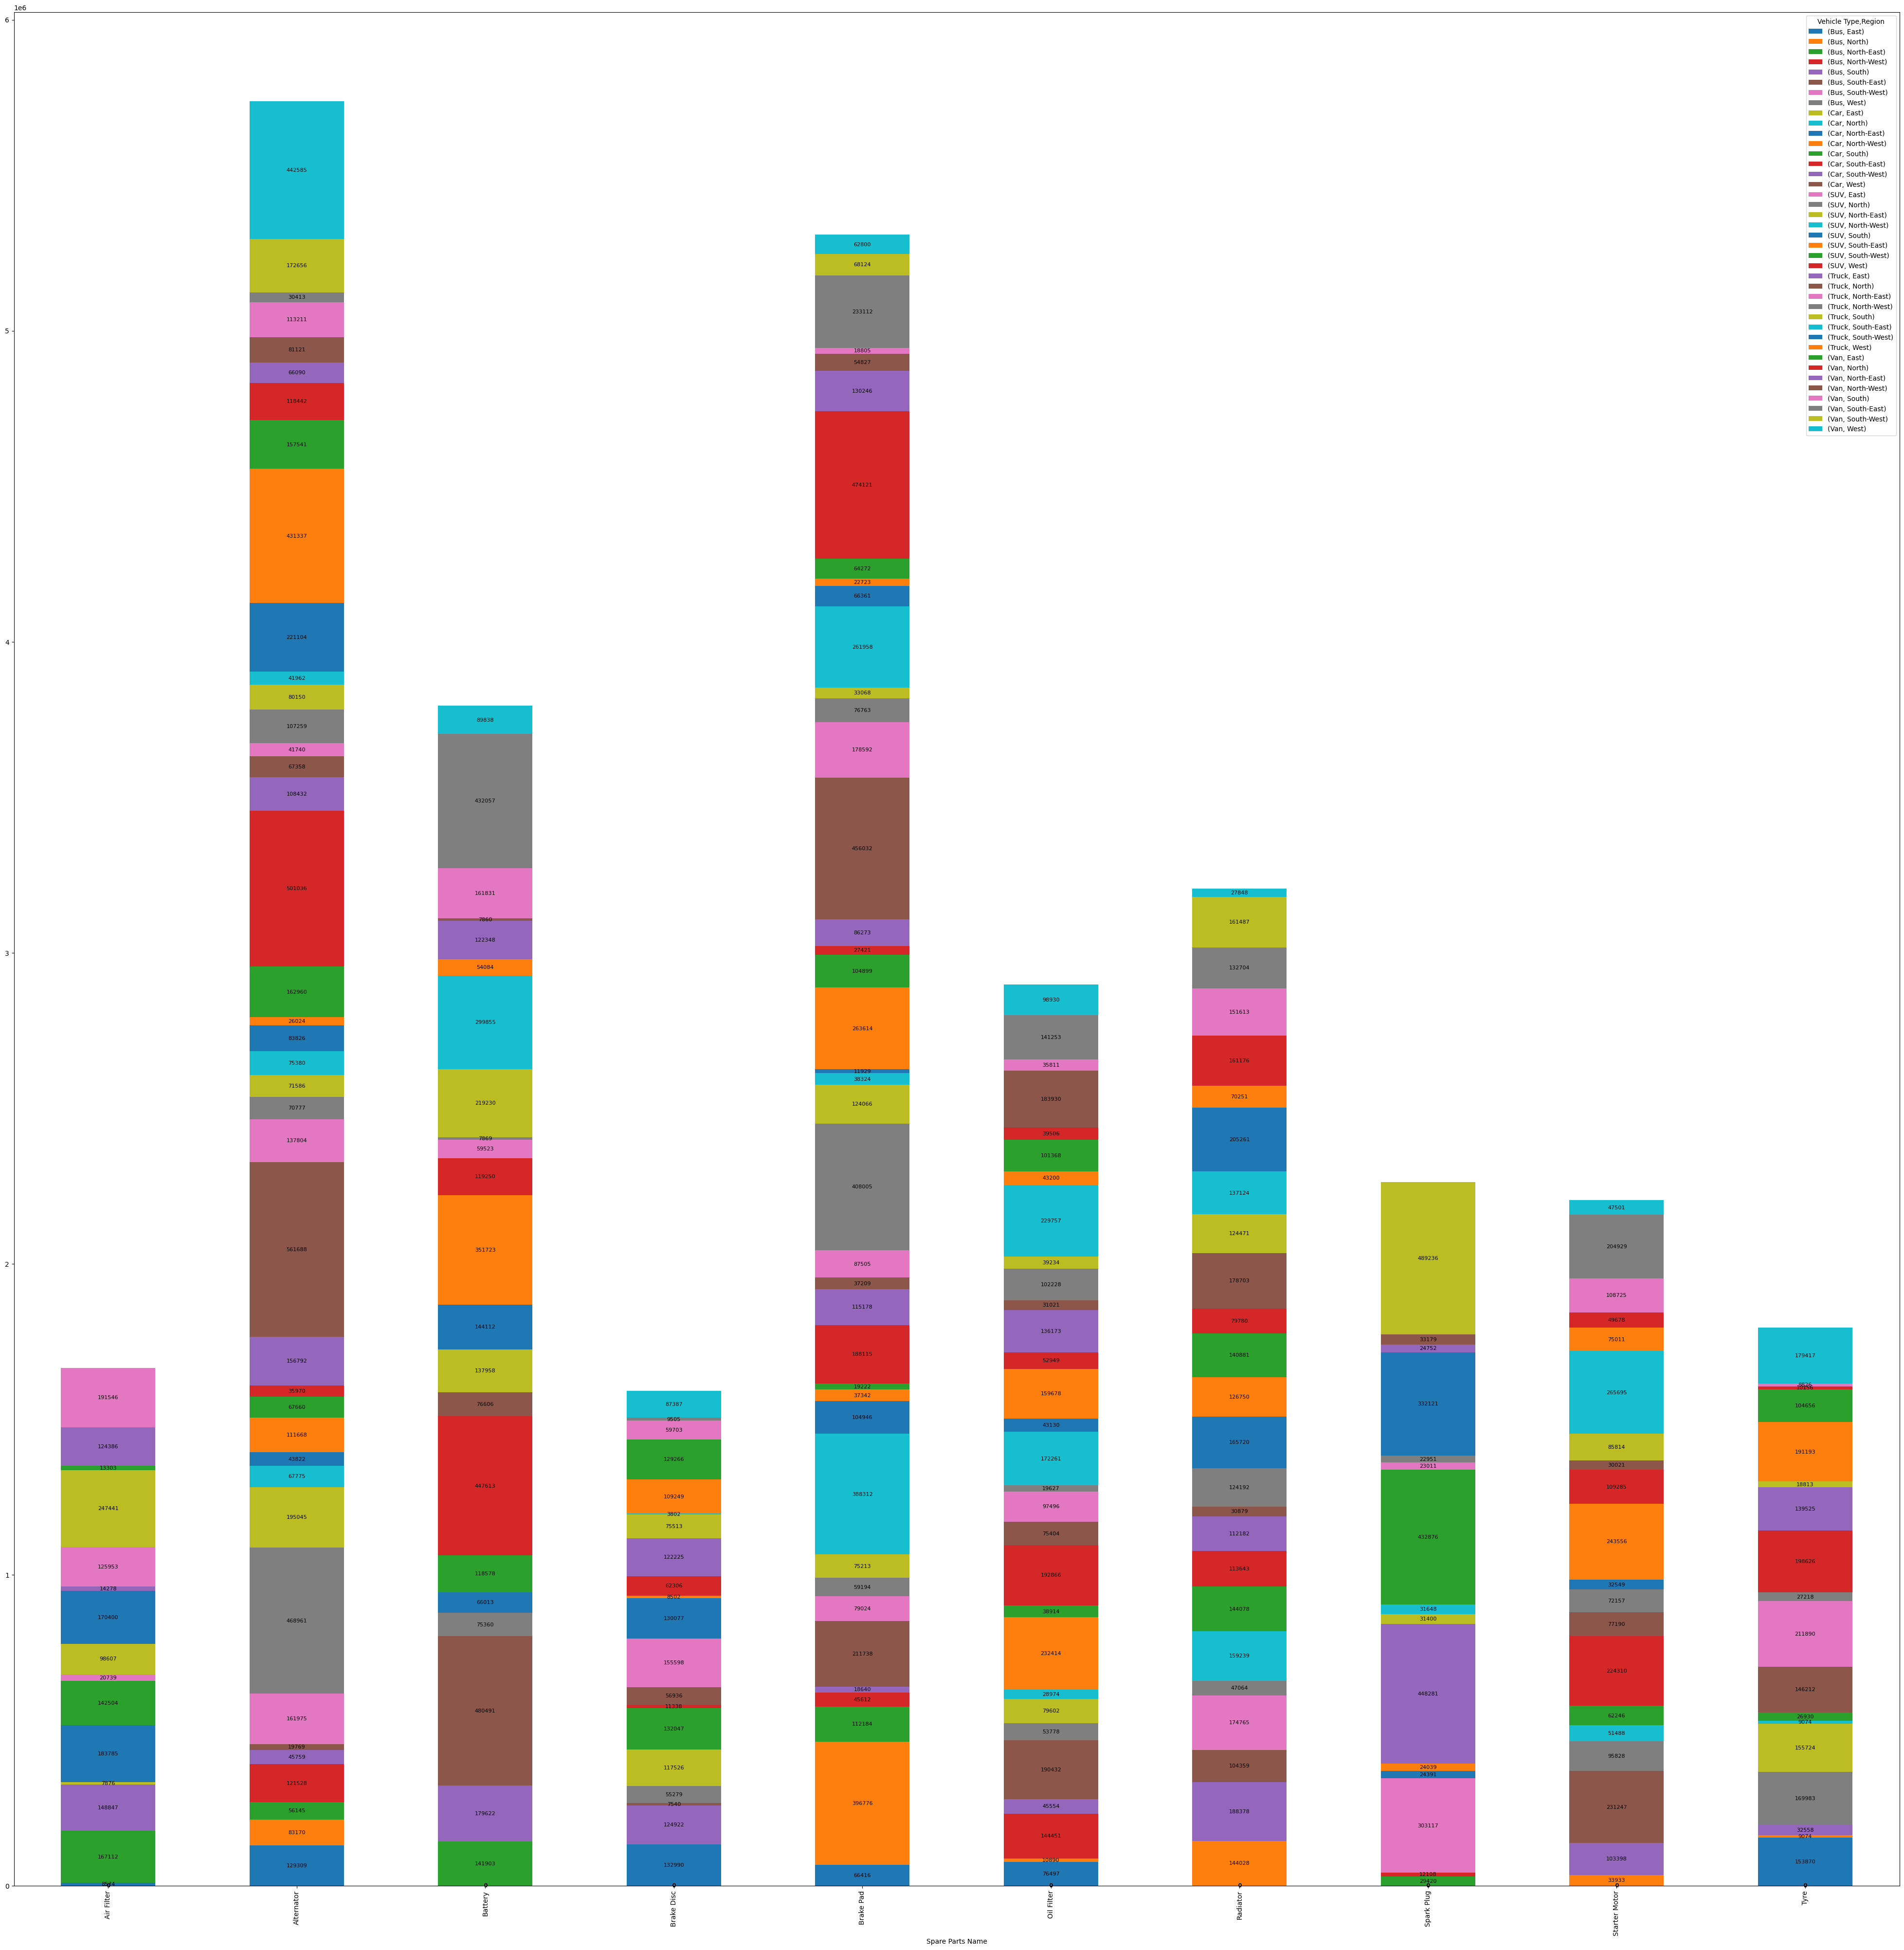

In [19]:
bx=pivot3.plot(kind='bar', stacked=True, figsize=(50, 50))
for container in bx.containers:
    bx.bar_label(container, label_type='center', fontsize=8)

## Interpretation
The above Stack Bar, shows the volume for each type of spare part for every vehicle type in each region.

(a) Air Filter has highest volume (247441) in South region for the Truck. Lowest (7876) for Car in East region.

(b) Alternator has highest volume (561688) in West region and for the Car. Lowest (30413) for Van in South-East region.

(c) Battery has highest volume (480491) in South-East region for the Bus. Lowest (7860) for Van in North-West region.

(d) Brake Disc has highest volume (132990) in East region for the Bus. Lowest (3802) for Car in North region.

(e) Brake Pad has highest volume (474121) in North region for the Van. Lowest (11,929) for SUV in South region.

(f) Oil Filter has highest volume (232414) in North-West region for the Car. Lowest (10,890) for Bus in North region.

(g) Radiator has highest volume (205261) in South-West region for the Truck. Lowest (27,848) for Van in West region.

(h) Spark Plug has highest volume (489236) in Soth-West region for the Van. Lowest (12108) for Bus in North-West region.

(i) Starter Motor has highest volume (265695) South-East region for the Truck. Lowest (30021) for Truck in North region.

(j) Tyre has highest volume (211890) in North-East region for the Truck and Lowest (8,826) for Van in South region.

# Summary - Spare Parts Vs Vehicle Type Vs Region


For Truck Vehicle Type, spare parts supplier should keep high stock of 

* Air fliter in south region, 
* Radiator in south-west region,
* Starter motor in south east region 
* Tyre in north-east region.   

Spare part supplier should keep low stock of
* Starter motor in North Region. 

For Bus Vehicle Type, spare parts suppplier should keep high stock of 
* Brake Disc in East region, 
* Battery in South-East region.    

Spare part supplier should keep low stock of
* Oil Filter in North region, 
* Spark Plug in North-west region. 

For Car Vehicle Type, Spare parts supplier should keep high stock of 

* Alternator in West region, 
* Oilfilter in North-west region.

Spare part supplier should keep low stock of
* Air filter in East region, 
* Brake disc in North region. 

For Van Vehicle Type, Spare parts supplier should keep high stock of 

* Brakepad in North region, 
* Spark plug in South-west region,

Spare part supplier should keep low stock of
* Alternator in South-west region, 
* Battery in North-west region, 
* Radiator in West region and 
* Tyre in South region.

For SUV Vehicle Type, Spare parts supplier should keep low stock of 

* Brakepad in South Region.

# Visualising the Vehicle Type and Weather condition with respect to Volume of Spare Parts supplied

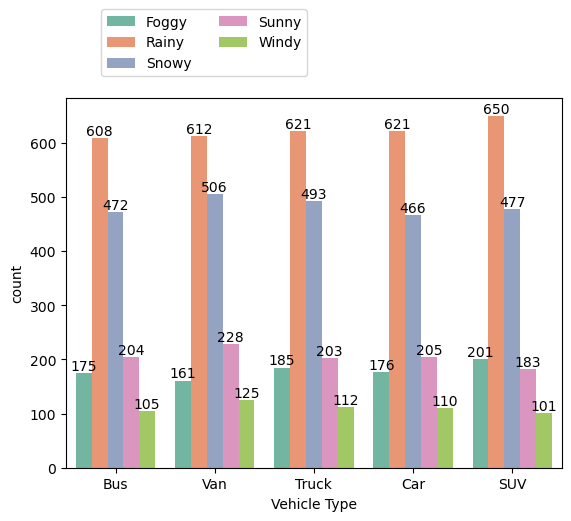

In [20]:
gx=sns.countplot(x=data["Vehicle Type"],hue=data["Weather Condition"],data=data["Volume of Spare Parts Supplied"],palette="Set2")
gx.legend(loc='right', bbox_to_anchor=(0.5, 1.15), ncol=2)
for p in gx.patches:
    gx.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top', xytext=(0, 10), textcoords='offset points')

# Interpretation :
(a) The number of occurrences of the bus vehicle type are 175 for foggy, 608 for rainy, 472 for snowy, 204 for sunny, and 105 for windy. 

(b) Van vehicle type shows number of occurences 161 for Foggy, 612 for Rainy, 506 for snowy, 228 for sunny and 125 for windy. 

(c) Truck vehicle type shows number of occurences 185 for Foggy, 621 for Rainy, 493 for snowy, 203 for sunny and 112 for windy. 

(d) Car vehicle type shows number of occurences 176 for Foggy, 621 for Rainy, 466 for snowy, 205 for sunny and 110 for windy 

(e) SUV vehicle type shows number of occurences 201 for Foggy, 650 for Rainy, 477 for snowy, 183 for sunny and 101 for windy.

# Summary :

(a) In the case of Rainy and Foggy weather conditions, the spare part supplier must maintain High volume of SUV spare Parts.   

(b) In the case of Snowy, Sunny and Windy weather conditions, the spare part supplier must maintain High volume of spare parts for van Vehicle Type.   

(c) When it is raining, a lot of spare parts are supplied for buses, vans, trucks, cars, and SUVs, whereas when it is windy, fewer spare parts are supplied. This means that, in comparison to other weather situations, spare part supplier must maintain a high volume of spare parts for in Rainy Weather Condition.

## Creating pivot table for Spare Parts Name and City vs Volume of Spare Parts supplied

In [21]:
pivot6 = data.pivot_table(index='Spare Parts Name',columns="City",values="Volume of Spare Parts Supplied",fill_value=0)
pivot6

City                Aaronside  Acevedomouth  Adamshaven   Adamsmouth  \
Spare Parts Name                                                       
Air Filter           0.000000             0         0.0     0.000000   
Alternator        1112.666667          5702      3227.0  3144.333333   
Battery              0.000000             0         0.0     0.000000   
Brake Disc           0.000000             0         0.0     0.000000   
Brake Pad            0.000000             0         0.0     0.000000   
Oil Filter        8896.000000             0         0.0  3023.000000   
Radiator          5005.500000          8905       628.5  3464.000000   
Spark Plug           0.000000             0         0.0     0.000000   
Starter Motor      787.000000          8898         0.0  2537.666667   
Tyre                 0.000000             0         0.0     0.000000   

City                 Adamtown  Adkinsland  Aguilarchester  Aguilarhaven  \
Spare Parts Name                                                          
Air Filter           0.000000         0.0        0.000000      0.000000   
Alternator        3320.666667      3385.4     3476.333333   3156.000000   
Battery              0.000000         0.0        0.000000      0.000000   
Brake Disc           0.000000         0.0        0.000000      0.000000   
Brake Pad            0.000000         0.0        0.000000      0.000000   
Oil Filter           0.000000       472.0     2500.250000   3029.000000   
Radiator          3463.500000         0.0     3480.000000   3481.333333   
Spark Plug           0.000000         0.0        0.000000      0.000000   
Starter Motor     1316.333333      3469.5        0.000000    689.000000   
Tyre                 0.000000         0.0        0.000000      0.000000   

City              Alexanderchester  Alexandrashire  ...  Wilsonbury  Woodbury  \
Spare Parts Name                                    ...                         
Air Filter                     0.0             0.0  ...         0.0       0.0   
Alternator                  3305.2          2902.6  ...         0.0       0.0   
Battery                        0.0             0.0  ...         0.0       0.0   
Brake Disc                     0.0             0.0  ...       965.0    9916.0   
Brake Pad                      0.0             0.0  ...         0.0       0.0   
Oil Filter                   699.0             0.0  ...      6858.0    4468.6   
Radiator                    3031.0          3035.0  ...      9898.5    5132.0   
Spark Plug                     0.0             0.0  ...       456.5       0.0   
Starter Motor               3482.0          1748.0  ...         0.0       0.0   
Tyre                           0.0             0.0  ...         0.0       0.0   

City              Woodwardshire   Wrightfurt  Xavierfurt  Yatesside  \
Spare Parts Name                                                      
Air Filter             0.000000     0.000000         0.0          0   
Alternator          5297.333333     0.000000       986.0       3001   
Battery                0.000000     0.000000         0.0          0   
Brake Disc             0.000000  2990.333333      1980.5       2996   
Brake Pad              0.000000     0.000000         0.0          0   
Oil Filter           986.000000     0.000000       986.0        986   
Radiator            5144.500000  1654.333333       677.5       3004   
Spark Plug          9917.000000  1723.000000      2995.0       2996   
Starter Motor          0.000000     0.000000         0.0          0   
Tyre                   0.000000     0.000000         0.0          0   

City              Yolandaborough  Yolandachester  Yolandastad  Zacharyburgh  
Spare Parts Name                                                             
Air Filter                   0.0             0.0          0.0          0.00  
Alternator                3001.0             0.0       1262.5        986.00  
Battery                      0.0             0.0          0.0          0.00  
Brake Disc        

### This pivot table interprets that -

(a) 432 Cities are supplied with 5737830 alternators. Highest alternator count (7545) for city Tuckerbury and minimum alternator count (94) for city Mcleanmouth.

(b) 253 Cities are supplied with 1665351 Air Filter. Highest Air Filter count (7491) for city Port Craig and minimum Air Filter count (5) for city Duffyland.

(c)  370 Cities are supplied with 3793724 Battery. Highest Battery count (7581) for city Port Roberview and minimum Battery count (192) for city Burges Shaven.

(d) 271 Cities are supplied with 1591711 Brake Disc. Highest Brake Disc count (7636) for city Ryanbury and minimum Brake Disc count (293) for city Dominguezbury.

(e) 549 Cities are supplied with 5308961 Brake Pad. Highest Brake Pad count (7816) for city Waltersburgh and minimum Brake Pad count (376) for city Caldwellview.

(f) 400 Cities are supplied with 2897328 Oil Filter. Highest Oil Filter count (7558) for city Zacharyburgh and minimum Oil Filter count (606) for city Adkinsland.

(g) 456 Cities are supplied with 3206576 Radiator. Highest Radiator count (7911) for city West James and minimum Radiator count (692) for city Bryatview.

(h) 295 Cities are supplied with 2262530 Spark Plug. Highest Spark Plug count (7931) for city Janetvlle and minimum Spark Plug count (780) for city Donaldfort.

(i) 285 Cities are supplied with 2204561 Starter Motor. Highest Starter Motor count (7941) for city North scott and minimum Starter Motor count (802) for city Adamsmouth.

(j) 305 Cities are supplied with 1793745 Tyre. Highest Tyre count (7999) for city Watsonborough and minimum Tyre count (845) for city East Somanthaport.

### Summary 
* For Alternator, spare part supplier should have high volume of spare parts in Tuckerbury whereas low in Mcleanmount.

* For Air Filter, spare part supplier should have high volume of spare parts in Port Craig whereas low in Duffyland.

* For Battery, spare part supplier should have high volume of spare parts in Port Roberview whereas low in Burges Shaven.

* For Brake Disc, spare part supplier should have high volume of spare parts in Ryanbury whereas low in Dominguezbury.

* For Brake Pad, spare part supplier should have high volume of spare parts in  Waltersburgh whereas low in Caldwellview.

* For Oil Filter, spare part supplier should have high volume of spare parts in Zacharyburg whereas low in Adkinsland.

* For Radiator, spare part supplier should have high volume of spare parts in West James whereas low in Bryatview.

* For Spark Plug, spare part supplier should have high volume of spare parts in Janetvlle whereas low in Donaldfort.

* For Starter Motor, spare part supplier should have high volume of spare parts in North scott whereas low in Adamsmouth

* For Tyre, spare part supplier should have high volume of spare parts in Watsonborough whereas low in  East Somanthaport.

# Label Encoding 

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Vehicle_Type_Encoded']=le.fit_transform(data['Vehicle Type'])
data['Spare_Parts_Name_Encoded']=le.fit_transform(data['Spare Parts Name'])
data['Region']=le.fit_transform(data['Region'])
data['Weather_encoded']=le.fit_transform(data['Weather Condition'])
#data['City']=le.fit_transform(data['City'])
data.head(200)

Date Spare Parts Name  Region              City  Replacement Cycle  \
0   2021-05-12       Air Filter       4         Duffyland                750   
1   2021-05-12       Air Filter       4       Dunlapville                750   
2   2021-05-12       Air Filter       4       Dunlapville                750   
3   2021-05-20       Air Filter       4   East Carriefort                744   
4   2021-05-20       Air Filter       4  East Charlesbury                743   
..         ...              ...     ...               ...                ...   
195 2021-03-31          Battery       5      Carlsonmouth                772   
196 2021-03-31          Battery       5      Carlsonmouth                772   
197 2021-04-02          Battery       4      Chapmanhaven                771   
198 2021-04-04          Battery       4   Charlenechester                770   
199 2021-04-05          Battery       4      Charlesshire                769   

     Re-Order Level  Lead time  Weather Condition Vehicle Type  \
0               134           4             Foggy          Bus   
1               134           4             Foggy          Van   
2               134           4             Foggy          Bus   
3               149           5             Foggy        Truck   
4               149           5             Foggy          Car   
..              ...         ...               ...          ...   
195              73           3             Foggy        Truck   
196              73           3             Foggy          SUV   
197              77           3             Foggy          Van   
198              80           3             Foggy          Bus   
199              80           3             Foggy          Van   

     Volume of Spare Parts Supplied  Vehicle_Type_Encoded  \
0                              1232                     0   
1                              1233                     4   
2                              1234                     0   
3                              1235                     3   
4                              1236                     1   
..                              ...                   ...   
195                             720                     3   
196                             721                     2   
197                             739                     4   
198                             785                     0   
199                             789                     4   

     Spare_Parts_Name_Encoded  Weather_encoded  
0                           0                0  
1                           0                0  
2                           0                0  
3                           0                0  
4                           0                0  
..                        ...              ...  
195                         2                0  
196                         2                0  
197                         2                0  
198                         2                0  
199                         2                0  

[200 rows x 13 columns]

# Visualising Pie Chart with respect to Types of Vehicle and Volume of Spare Parts supplied

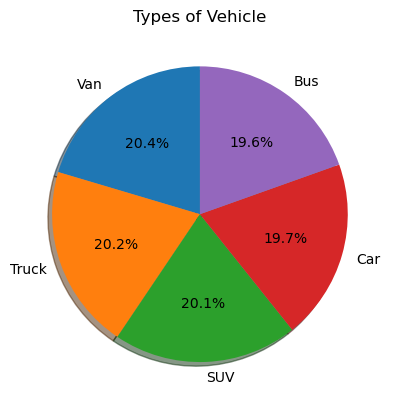

In [23]:
import matplotlib.pyplot as plt
import pandas as pd# Load the excel file into a pandas dataframe 
# Get the count of each label in the multi-label column
labels = data['Vehicle Type'].value_counts().index
sizes = data['Vehicle_Type_Encoded'].value_counts().values# Plot the pie chart
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%', shadow=True)# Add a title to the chart
plt.title("Types of Vehicle")# Show the chart
plt.show()

The pie chart depicts uniform distribution (percentage) of Spare Parts Supplied for each Type of Vehicle. Thus the volume of Spare Parts to be maintained and supplied, is not dependent on the Type Of Vehicle. Every Vehicle is equally important.

# Visualisation 
1. Region vs Lead Time
2. Weather vs Lead Time

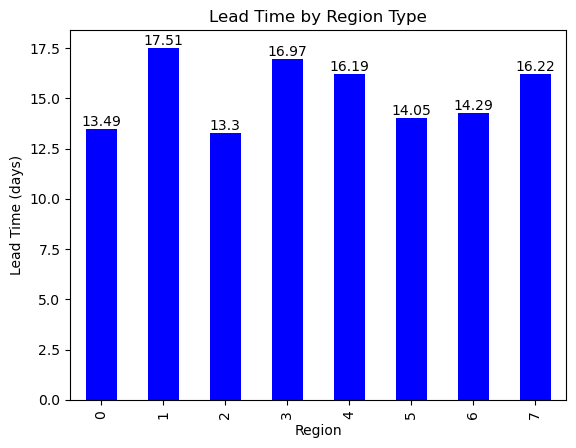

In [24]:
import pandas as pd
import matplotlib.pyplot as plt# Load the data from an Excel file 
# Group the data by city type and calculate the mean lead time for each group
grouped = data.groupby('Region').mean()['Lead time ']# Plot the lead time for each city type as a bar plot
grouped.plot(kind='bar', color='blue')# Add labels and title to the plot
plt.xlabel('Region')
plt.ylabel('Lead Time (days)')
plt.title('Lead Time by Region Type')# Show the plot
for index, value in enumerate(grouped):
    plt.annotate(str(round(value,2)), xy=(index, value), ha='center', va='bottom')
plt.show()

# Interpretation : 

(a) Higher Lead Time is required for supplying the Spare parts to - Region 1 (North), 3 (North West), 4 (South) and 7 (West)

(b) Lower Lead Time is required for supplying the Spare parts to - Region 0 (East), 2 (North East), 5 (South East) and 6 (South West)


## Summary :

Spare part supplier should try to maintain low lead time in north, north-west, south and west region whereas in region east, north east,south-east and south-west there is no need to lower the lead time.

## Lead Time By Weather

In [25]:
df1=data[["Weather Condition","Lead time "]]
df1["Weather Condition"].value_counts()

Rainy    3112
Snowy    2414
Sunny    1023
Foggy     898
Windy     553
Name: Weather Condition, dtype: int64

In [26]:
df1["Weather Condition"]=df1["Weather Condition"].replace(['Sunny'],['Rainy'])

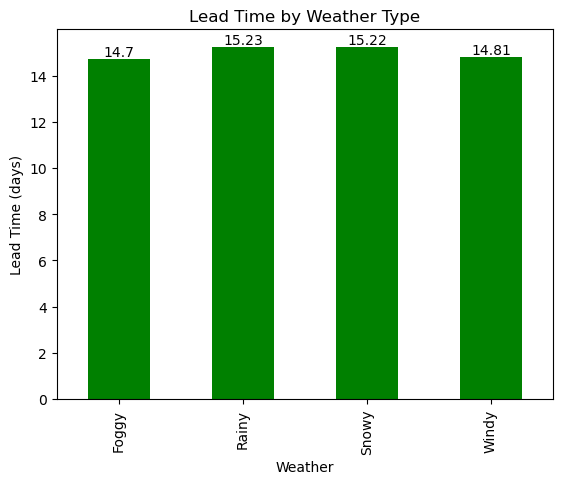

In [27]:
# Group the data by city type and calculate the mean lead time for each group
grouped = df1.groupby('Weather Condition').mean()['Lead time ']# Lead time Plot the lead time for each city type as a bar plot
grouped.plot(kind='bar', color='green')# Add labels and title to the plot
plt.xlabel('Weather')
plt.ylabel('Lead Time (days)')
plt.title('Lead Time by Weather Type')# Show the plot
for index, value in enumerate(grouped):
    plt.annotate(str(round(value,2)), xy=(index, value), ha='center', va='bottom')
plt.show()

## Interpretation :

(a) Higher Lead Time is required for supplying the Spare parts in Rainy Weather Condition.

(b) Lower Lead Time is required for supplying the Spare parts in Foggy Weather Condition.


## Summary :
Spare part Supplier needs to lower the lead time in Rainy & Snowy weather conditions whereas there is no need to lower the lead time in Foggy & windy weather condtions.

# This 3D plot is being created to analyze the relationship between Region, Weather Condition, and Lead time. 

The plot could be used to identify patterns or trends in the data that could inform strategic decision-making. For example, if the plot shows that certain regions experience consistent delays regardless of weather conditions, a business might choose to invest in infrastructure or resources to improve efficiency in those regions. 

In [28]:
# create a 3D line plot
fig = px.scatter_3d(data, x='Region', y='Weather Condition', z='Lead time ', color='Region')# show the plot
fig.show()

## Interpretation results from above 3D plot :-

In East Region for 
 * Windy weather condition Highest lead time is 27 while lowest is 1.
 * Snowy weather highest lead time is 25 and lowest is 1. 
 * Rainy weather highest lead time is 27 while lowest is  1.
 * Foggy weather condition highest lead time is 27 while lowest is 1.
 
In North Region for 
 * Windy weather condition Highest lead time is 30 while lowest is 2.
 * Snowy weather highest lead time is 30 and lowest is 2. 
 * Rainy weather highest lead time is 28 while lowest is  2.
 * Foggy weather condition highest lead time is 30 while lowest is 2.
 
In North-East Region for 
 * Windy weather condition Highest lead time is 22 while lowest is 4.
 * Snowy weather highest lead time is 24 and lowest is 4. 
 * Rainy weather highest lead time is 23 while lowest is 4.
 * Foggy weather condition highest lead time is 23 while lowest is 4.
 * Sunny weather condition highest lead time is 24 while lowest is 19.
 
In North-West Region for
 * Snowy weather highest lead time is 30 and lowest is 1. 
 * Rainy weather highest lead time is 30 while lowest is 1.
 * Foggy weather condition highest lead time is 30 while lowest is 1.
 * Sunny weather condition highest lead time is 30 while lowest is 1.
 
In South Region for
 * Snowy weather highest lead time is 30 and lowest is 2. 
 * Rainy weather highest lead time is 30 while lowest is 2.
 * Foggy weather condition highest lead time is 30 while lowest is 3.
 * Sunny weather condition highest lead time is 30 while lowest is 2.
 
In South-East Region for
 * Snowy weather highest lead time is 29 and lowest is 1. 
 * Rainy weather highest lead time is 29 while lowest is 1.
 * Foggy weather condition highest lead time is 23 while lowest is 1.
 * Sunny weather condition highest lead time is 28 while lowest is 1.
 
In South-West Region for
 * Snowy weather highest lead time is 30 and lowest is 1. 
 * Rainy weather highest lead time is 30 while lowest is 1.
 * Sunny weather condition highest lead time is 30 while lowest is 1.

In West Region for
 * Snowy weather highest lead time is 30 and lowest is 1. 
 * Rainy weather highest lead time is 30 while lowest is 1.
 * Sunny weather condition highest lead time is 30 while lowest is 1.

## Summary :

(a) In Sunny weather condition there is no supply of spare part in East & North Region.
 
(b) In Windy Weather Condition there is no supply of spare parts in North-West, South, South-East, South-West, West Region.

(c) In Foggy weather condition there is no supply of spare parts in South-West & West Region.

(d) In Regions North-west, South, South-West and West the Lead Time for spare part supply is observed to be Highest           I     irrespective of the weather conditions.

# This 3D plot is being created to analyze the relationship between Region, Weather Condition, and Re Order Level

In [29]:

# create a 3D line plot
fig = px.scatter_3d(data, x='Region', y='Weather Condition', z='Re-Order Level', color='Region')# show the plot
fig.show()

## Interpretation

In East Region for

* Windy weather condition Highest Reorder level is 896 while lowest is 1.
* Snowy weather highest Reorder level is 900 and lowest is 1.
* Rainy weather highest Reorder level is 898 while lowest is 3.
* Foggy weather condition highest Reorder level is 899 while lowest is 1.

In North Region for

* Windy weather condition Highest Reorder level is 1000 while lowest is 23.
* Snowy weather highest Reorder level is 998 and lowest is 3.
* Rainy weather highest Reorder level is 992 while lowest is 7.
* Foggy weather condition highest Reorder level is 999 while lowest is 23.

In North-East Region for

* Windy weather condition Highest Reorder level is 705 while lowest is 1.
* Snowy weather highest Reorder level is 766 and lowest is 1.
* Rainy weather highest Reorder level is 750 while lowest is 1.
* Foggy weather condition highest Reorder level is 761 while lowest is 1.
* Sunny weather condition highest Reorder level is 788 while lowest is 1.

In North-West Region for

* Snowy weather highest Reorder level is 983 and lowest is 2.
* Rainy weather highest Reorder level is 982 while lowest is 7.
* Foggy weather condition highest Reorder level is 983 while lowest is 7.
* Sunny weather condition highest Reorder level is 985 while lowest is 10.

In South Region for

* Snowy weather highest Reorder level is 984 and lowest is 3.
* Rainy weather highest Reorder level is 982 while lowest is 7.
* Foggy weather condition highest Reorder level is 981 while lowest is 3.
* Sunny weather condition highest Reorder level is 993 while lowest is 2.

In South-East Region for

* Snowy weather highest Reorder level is 963 and lowest is 1.
* Rainy weather highest Reorder level is 967 while lowest is 3.
* Foggy weather condition highest Reorder level is 201 while lowest is 3.
* Sunny weather condition highest Reorder level is 966 while lowest is 1.

In South-West Region for

* Snowy weather highest Reorder level is 1000 and lowest is 1.
* Rainy weather highest Reorder level is 1000 while lowest is 1.
* Sunny weather condition highest Reorder level is 1000 while lowest is 1.

In West Region for

* Snowy weather highest Reorder level is 999 and lowest is 7.
* Rainy weather highest Reorder level is 998 while lowest is 4.
* Sunny weather condition highest Reorder level is 999 while lowest is 4.

## Summary

a) In Regions North West, South, South East, West, and South West the Reorder level is 0 in windy weather condition.

(b) In Regions East and North the reorder level of the Spare Parts is 0 in Sunny Weather Condition. 

(c) In South West and West Regions the reorder level of the spare parts is 0 in foggy weather condition.

(d) When compared to other weather conditions, Every region's reorder levels are higher in Rainy and Snowy conditions.  
   It indicates that in Rainy and Snowy weather conditions there is a greater need for spare parts.

In [30]:
corr_df= pd.DataFrame(data, columns=['Region','Replacement Cycle','Lead time ','Re-Order Level','Volume of Spare Parts Supplied'])
corr_df.head()

Region  Replacement Cycle  Lead time   Re-Order Level  \
0       4                750           4             134   
1       4                750           4             134   
2       4                750           4             134   
3       4                744           5             149   
4       4                743           5             149   

   Volume of Spare Parts Supplied  
0                            1232  
1                            1233  
2                            1234  
3                            1235  
4                            1236

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(corr_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Region','Replacement Cycle','Lead time ','Re-Order Level','Volume of Spare Parts Supplied'])
df_scaled.head()

Region  Replacement Cycle  Lead time   Re-Order Level  \
0  0.571429              0.900    0.103448        0.133133   
1  0.571429              0.900    0.103448        0.133133   
2  0.571429              0.900    0.103448        0.133133   
3  0.571429              0.888    0.137931        0.148148   
4  0.571429              0.886    0.137931        0.148148   

   Volume of Spare Parts Supplied  
0                        0.118973  
1                        0.119074  
2                        0.119175  
3                        0.119276  
4                        0.119377

In [32]:
df_scaled.head()

Region  Replacement Cycle  Lead time   Re-Order Level  \
0  0.571429              0.900    0.103448        0.133133   
1  0.571429              0.900    0.103448        0.133133   
2  0.571429              0.900    0.103448        0.133133   
3  0.571429              0.888    0.137931        0.148148   
4  0.571429              0.886    0.137931        0.148148   

   Volume of Spare Parts Supplied  
0                        0.118973  
1                        0.119074  
2                        0.119175  
3                        0.119276  
4                        0.119377

In [33]:
df_scaled.corr(method ='kendall')

Region  Replacement Cycle  Lead time   \
Region                          1.000000          -0.025614    0.005184   
Replacement Cycle              -0.025614           1.000000   -0.548931   
Lead time                       0.005184          -0.548931    1.000000   
Re-Order Level                  0.053006          -0.427928    0.659380   
Volume of Spare Parts Supplied  0.113107          -0.261740    0.356395   

                                Re-Order Level  Volume of Spare Parts Supplied  
Region                                0.053006                        0.113107  
Replacement Cycle                    -0.427928                       -0.261740  
Lead time                             0.659380                        0.356395  
Re-Order Level                        1.000000                        0.288299  
Volume of Spare Parts Supplied        0.288299                        1.000000

<AxesSubplot:>

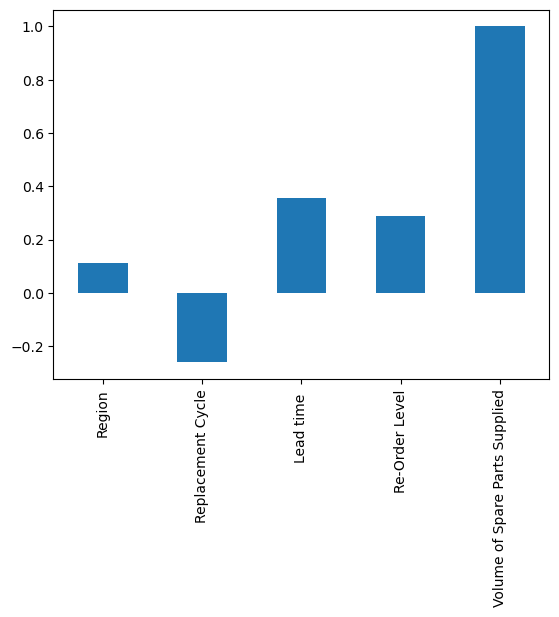

In [34]:
df_scaled.corr(method ='kendall')['Volume of Spare Parts Supplied'].plot(kind='bar')

<AxesSubplot:>

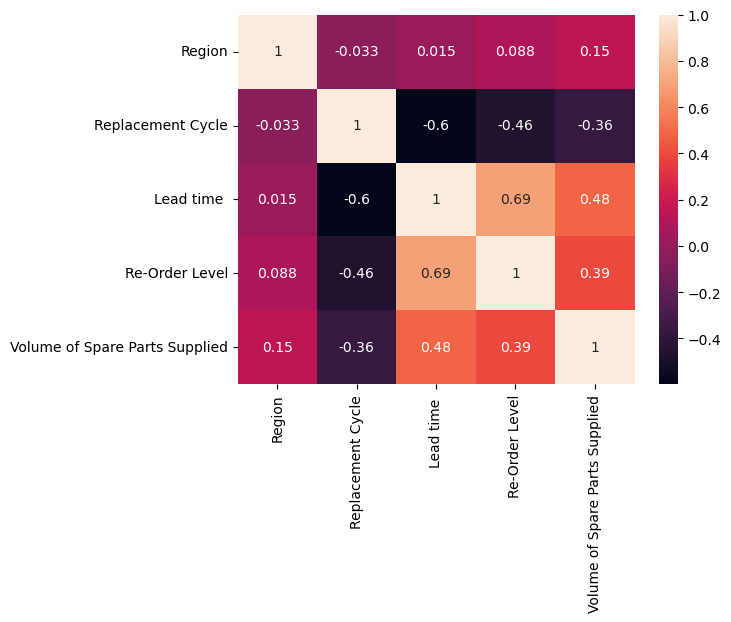

In [35]:
sns.heatmap(df_scaled.corr(method='pearson'),annot=True)

### Conclusion of Correlation Between Volume of Spare Part Supplied And Other Features

1) There is a positive correlation between lead time and the volume of spare parts supplied this implies that when lead time is higher, Dorma needs to maintain high level of spare part inventory. In order to maintain medium level of inventory, Dorma needs to  work on reducing high lead time. In North-West, South, South-West and West Regions the lead time for spare parts is highest in all weather conditions.

2) There is a negative correlation between the replacement cycle and the volume of spare parts supplied this indicates that if the replacement cycle is high, there is no need to maintain high volumes of spare parts. Dorma should optimize their inventory levels based on the replacement cycle of spare parts in order to avoid overstocking or understocking. 

3) There is a positive correlation between reorder level and volume of spare parts supplied this indicates that manufacturer is managing its reorder levels based on the expected demand for spare parts. By setting a optimal reorder level, Dorma can ensure that they have enough inventory to meet the expected demand and minimize the risk of overstocking. 

# Binning using Quantile Cut

In [36]:
data['Volume of Spare Parts Supplied'], cut_bin = pd.qcut(data['Volume of Spare Parts Supplied'], q = 3, labels = ['1', '2', '3'], retbins = True)
data["Volume of Spare Parts Supplied"]=data["Volume of Spare Parts Supplied"].astype(int)

# KDE plots for visualising volume of spare parts 

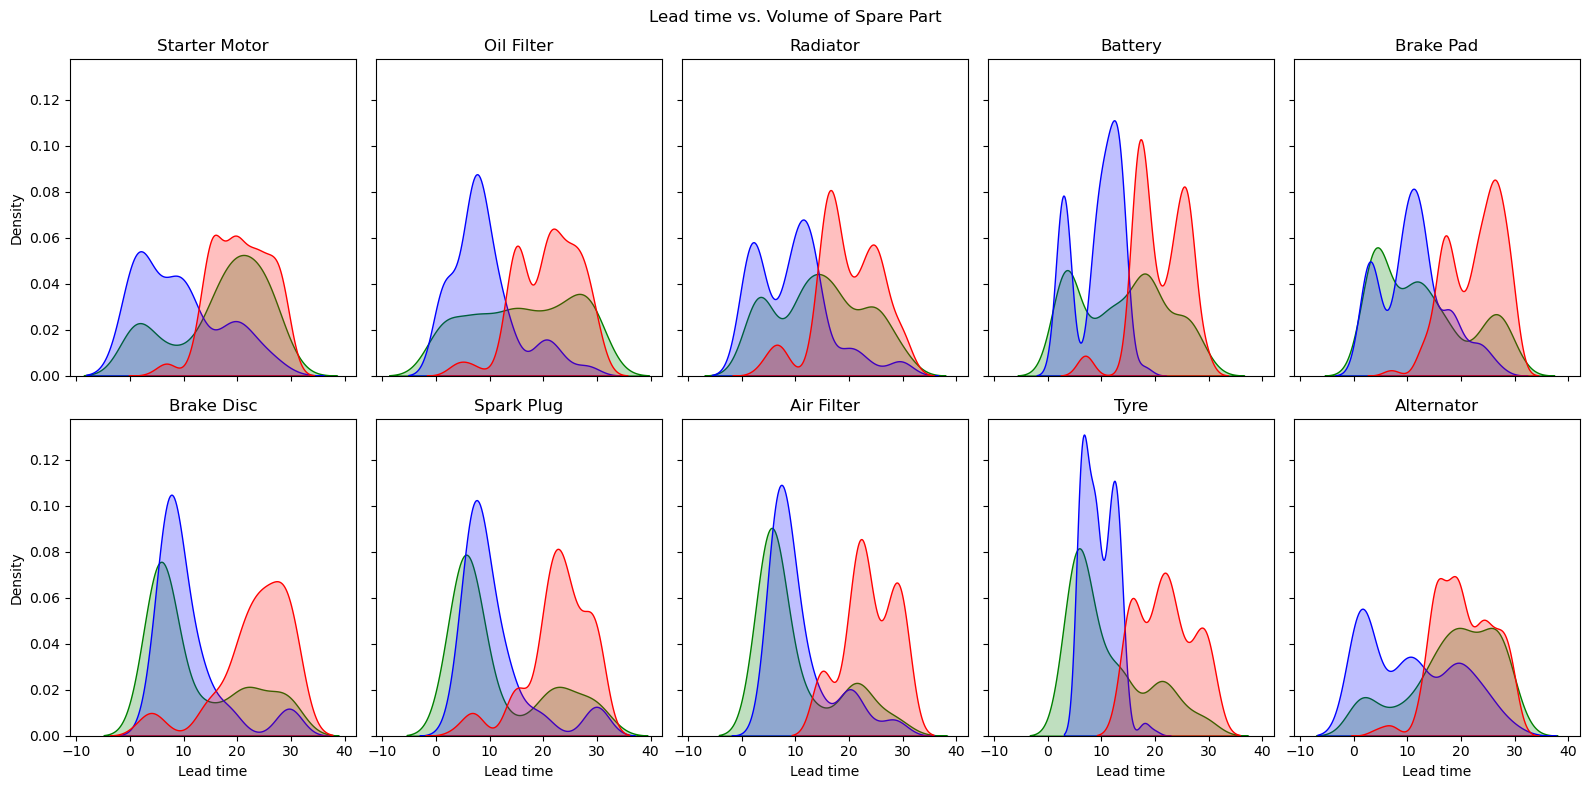

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
spare_parts = ['Starter Motor', 'Oil Filter', 'Radiator', 'Battery', 'Brake Pad','Brake Disc', 'Spark Plug', 'Air Filter', 'Tyre', 'Alternator']
grouped = data.groupby('Spare Parts Name')
fig, axs = plt.subplots(2, 5, figsize=(16, 8), sharex=True, sharey=True)

for i in range(0,10):
    row = i // 5
    col = i % 5
    df_new = grouped.get_group(spare_parts[i])
    sns.kdeplot(df_new['Lead time '][(df_new["Volume of Spare Parts Supplied"] == 1)], color="Green", shade=True, ax=axs[row, col])
    sns.kdeplot(df_new['Lead time '][(df_new["Volume of Spare Parts Supplied"] == 2)], color="Blue", shade=True, ax=axs[row, col])
    sns.kdeplot(df_new['Lead time '][(df_new["Volume of Spare Parts Supplied"] == 3)], color="Red", shade=True, ax=axs[row, col])
    axs[row, col].set_title(spare_parts[i])
    axs[row, col].set_xlabel('Lead time')
    
    
fig.suptitle('Lead time vs. Volume of Spare Part')
plt.tight_layout()
plt.show()

## Interpretation from the KDE Plots of All the spare parts with the volume of spare parts.

1] Starter Motor shows the high volume density for lead time between 15 to 20 and lowest volume density for 2.

2] Oil filter shows the high volume density for lead time 23 and lowest volume density for 7.

3] Radiator shows the high volume density for lead time 17 and lowest volume density for 12.

4] Battery shows the high volume density for lead time 17 and lowest volume density for 14.

5] Brake Pad shows the high volume density for lead time 27 and lowest volume density for 12.

6] Brake Disc shows the high volume density for lead time between 16 to 18 and lowest volume density for 9.

7] Spark Plug shows the high volume density for lead time 23 and lowest volume density for 9.

8] Air Filter shows the high volume density for lead time 22 and lowest volume density for 8.

9] Tyer shows the high volume density for lead time 22 and lowest volume density for 7.

10] Alternator shows the high volume density for lead time between 15 to 19 and lowest volume density for 3.

## Final Conclusion of KDE Plots -

a) Above KDE plot shows that for certain high values of lead time volume of spare parts shows highest density and for certain low values of lead time volume of spare parts shows lowest density.

b) Spare part supplier should maintain the volume of spare parts according to lead time to avoid overstocking and understocking of spare parts.

c) Break Pad has second highest volume of spare part which shows the highest lead time 27, so spare part supplier need to work on lead to maintain enough amount of brake pads which will help him to reduce storage cost.  

